Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

## Create dataset

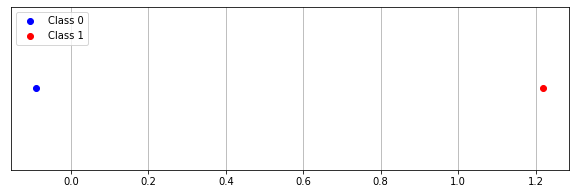

In [4]:
POINTS = 1
SCALE = 0.5

class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=POINTS), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=POINTS), decimals=2)
plt.figure(figsize=(10, 3))
plt.scatter(x=class0, y=np.zeros(POINTS), c="blue", label="Class 0")
plt.scatter(x=class1, y=np.zeros(POINTS), c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid(axis="x")
plt.gca().get_yaxis().set_visible(False)

## Handmade Neural network

In [5]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

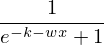

In [6]:
x_, k_, w_ = sympy.symbols("x k w")
val = w_ * x_ + k_
perceptron = sigmoid(val)
perceptron

### Define *loss* and calculate loss's gradient

In [7]:
def loss_function(v, e):
    return (v - e) ** 2

In [8]:
loss = 0
for x in class0:
    loss = loss + loss_function(perceptron.subs(x_, x), 0)
for x in class1:
    loss = loss + loss_function(perceptron.subs(x_, x), 1)

### Our *loss* function

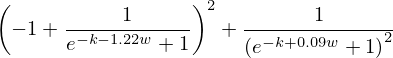

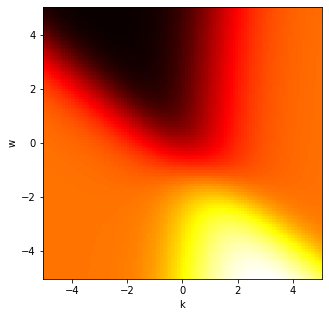

In [9]:
RANGE = 5
plt.figure(figsize=(5, 5))
t = np.linspace(-RANGE, RANGE, 100)
K, W = np.meshgrid(t, t)
loss_f = sympy.lambdify((k_, w_), loss)
plt.pcolormesh(K, W, loss_f(K, W), cmap="hot")
plt.xlabel("k")
plt.ylabel("w")

loss

### Let's minimize the loss

Simple gradient descent (note: loss in log scale)

In [10]:
grad = sympy.derive_by_array(loss, (k_, w_))
grad_f = sympy.lambdify((k_, w_), grad)

 1: [-4.24022716  7.76267585] -> loss = 7.891959390827806e-05 / grad = [ 4.40518744e-05 -7.78264977e-05]
 2: [-4.2402065   7.76263935] -> loss = 7.892334483550998e-05 / grad = [ 4.40539628e-05 -7.78301838e-05]
 3: [-4.23996162  7.76220672] -> loss = 7.89678164083653e-05 / grad = [ 4.40787227e-05 -7.78738867e-05]


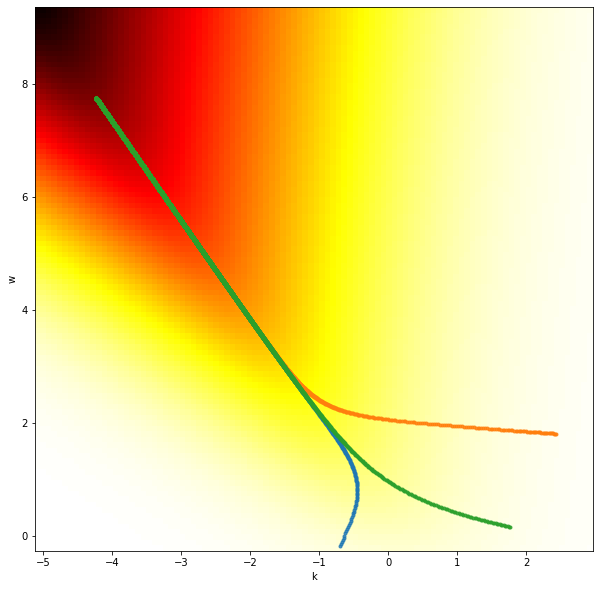

In [12]:
LEARNING_RATE = 0.1

minx, miny = 0, 0
maxx, maxy = 0, 0
paths = list()
for lines in range(3):
    points = [np.random.random(2) * RANGE - RANGE / 2]
    for step in range(100_000):
        p = points[-1]
        minx, miny = min(minx, p[0]), min(miny, p[1])
        maxx, maxy = max(maxx, p[0]), max(maxy, p[1])
        l = np.array(loss_f(*p))
        g = np.array(grad_f(*p))
        points.append(p - LEARNING_RATE * g)
    paths.append(np.array(points))
    print(f"{lines+1:2d}: {np.array(p)} -> loss = {l} / grad = {g}")

plt.figure(figsize=(10, 10))
x = np.linspace(minx * 1.2, maxx * 1.2, 100)
y = np.linspace(miny * 1.2, maxy * 1.2, 100)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, np.log(loss_f(X, Y)), cmap="hot")
for p in paths:
    plt.scatter(x=p[:, 0], y=p[:, 1], color=None, marker=".", alpha=0.8)

plt.xlabel("k")
plt.ylabel("w")
None

### Plot perceptron with *fitted* parameters

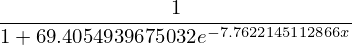

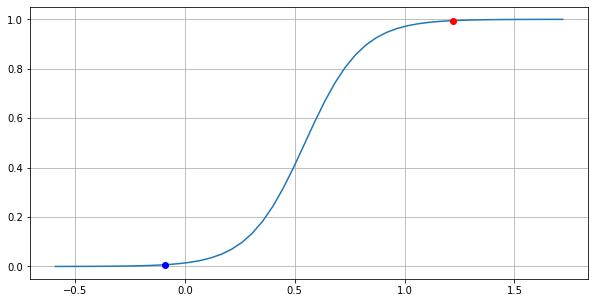

In [13]:
perceptron_fitted = perceptron.subs([(k_, paths[-1][-1][0]), (w_, paths[-1][-1][1])])
perceptron_fitted_f = sympy.lambdify(x_, perceptron_fitted)
x = np.linspace(min(class0.min(), class1.min()) - 0.5, max(class0.max(), class1.max()) + 0.5)
plt.figure(figsize=(10, 5))
plt.plot(x, perceptron_fitted_f(x))
for p in class0:
    plt.plot(p, perceptron_fitted_f(p), marker="o", color="blue")
for p in class1:
    plt.plot(p, perceptron_fitted_f(p), marker="o", color="red")
plt.grid()

perceptron_fitted